<a href="https://colab.research.google.com/github/MarinaWolters/Coding-Tracker/blob/master/W7_Data_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lecture Notebook: Information Visualization


This notebook covers several things:

1. The basics of plotting Pandas dataframes using matplotlib.
2. Some rules of thumb about bar vs line charts, axes, normalization, and whether to interpolate.
3. Basics of ggplot on Python
4. Seaborn and visualization of statistical data

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Loading familiar data into Pandas

We'll use the CEOs dataset from Wikipedia as an example to compare two different sub-populations: those CEOs who are actually **founders**, and those who are simply "**regular CEOs**".

In [4]:
# Read the Wikipedia HTML table containing information about CEOs!
company_ceos_df = pd.read_html('https://en.wikipedia.org/wiki/List_of_chief_executive_officers#List_of_CEOs')[0]
company_ceos_df

,Company,Executive,Title,Since,Notes,Updated
0,Accenture,Julie Sweet,CEO[1],2019,"Succeeded Pierre Nanterme, died",2019-01-31
1,Aditya Birla Group,Kumar Mangalam Birla,Chairman[2],1995[2],Part of the Birla family business house in India,2018-10-01
2,Adobe Systems,Shantanu Narayen,"Chairman, president and CEO[3]",2007,Formerly with Apple,2018-10-01
3,Agenus,Garo H. Armen,"Founder, chairman, CEO[4]",1994,Founder of the Children of Armenia Fund (COAF),2018-10-01
4,Airbus,Guillaume Faury,CEO[5],2012,Succeeded Louis Gallois,2017-11-14
...,...,...,...,...,...,...
170,Williams-Sonoma,Laura J. Alber,President and CEO[155],2010,Replaced W. Howard Lester,2017-11-11
171,WWE,Stephanie McMahon,Chairwoman and Co-CEO (Alongside Nick Khan) [156],2022,Chairwoman of the executive committeeChairwoma...,2017-11-11
172,Yum! Brands,Greg Creed,CEO[157],2015,Previously CEO for Taco Bell,2017-11-11
173,Zillow Group,Rich Barton,CEO[158],2019,Co-founder and previously was Zillow's CEO for...,2018-12-10


In [5]:
# Clean the source references aka '1995[2]' out of the Since field and the Title field...
company_ceos_df['Since'] = company_ceos_df['Since'].apply(lambda x: int(x.split('[')[0].strip()) if '[' in x else int(x))
company_ceos_df['Title'] = company_ceos_df['Title'].apply(lambda x: x.split('[')[0].strip() if '[' in x else x)

# Show the output
company_ceos_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175 entries, 0 to 174
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Company    175 non-null    object
 1   Executive  175 non-null    object
 2   Title      175 non-null    object
 3   Since      175 non-null    int64 
 4   Notes      173 non-null    object
 5   Updated    170 non-null    object
dtypes: int64(1), object(5)
memory usage: 8.3+ KB


Now that we have the data, let's split into two dataframes.

In [3]:
# Extracts the founding CEOs into founder_df by applying a check if the word 'founder' comes up in Title
founders_df = company_ceos_df[company_ceos_df['Title'].apply(lambda s: True if 'founder' in s.lower() else False)]
founders_df

,Company,Executive,Title,Since,Notes,Updated
3,Agenus,Garo H. Armen,"Founder, chairman, CEO",1994,Founder of the Children of Armenia Fund (COAF),2018-10-01
20,Bharti Enterprises,Sunil Bharti Mittal,Founder and chairman,1985,Founder of the firm,2018-10-01
21,Blackstone Group,Stephen A. Schwarzman,"Chairman, CEO and co-founder",1985,Co-founded the firm with Peter George Peterson,2017-11-15
28,Canonical,Mark Shuttleworth,Founder and CEO,2017,Stepped down as CEO in 2009 and resumed in 2017,2017-11-14
29,Capital One Financial,Richard Fairbank,"Founder, chairman and CEO",1988,Co-founded the firm with Nigel Morris,2017-11-14
53,Fenty Beauty,Rihanna,Founder and CEO,2017,became self-made billionaire due to success of...,2017-09-08
60,FUBU,Daymond John,"Founder, president and CEO",1992,Also an investor on the American version of Sh...,2017-11-14
99,Mossy Oak,Toxey Haas,Founder and CEO,1986,Founder of the firm,2017-11-13
146,TCL Corporation,Li Dongsheng,CEO & Founder,1981,Been with the company since the beginning,NaN


In [6]:
# This is a set difference: we keep only items that are duplicated
regular_ceos_df = pd.concat([company_ceos_df, founders_df]).drop_duplicates(keep=False)

In [7]:
# For inspection: who are non-founders?
regular_ceos_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 166 entries, 0 to 174
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Company    166 non-null    object
 1   Executive  166 non-null    object
 2   Title      166 non-null    object
 3   Since      166 non-null    int64 
 4   Notes      164 non-null    object
 5   Updated    162 non-null    object
dtypes: int64(1), object(5)
memory usage: 9.1+ KB


In [8]:
# For inspection: who are non-founders?
founders_df

,Company,Executive,Title,Since,Notes,Updated
3,Agenus,Garo H. Armen,"Founder, chairman, CEO",1994,Founder of the Children of Armenia Fund (COAF),2018-10-01
20,Bharti Enterprises,Sunil Bharti Mittal,Founder and chairman,1985,Founder of the firm,2018-10-01
21,Blackstone Group,Stephen A. Schwarzman,"Chairman, CEO and co-founder",1985,Co-founded the firm with Peter George Peterson,2017-11-15
28,Canonical,Mark Shuttleworth,Founder and CEO,2017,Stepped down as CEO in 2009 and resumed in 2017,2017-11-14
29,Capital One Financial,Richard Fairbank,"Founder, chairman and CEO",1988,Co-founded the firm with Nigel Morris,2017-11-14
53,Fenty Beauty,Rihanna,Founder and CEO,2017,became self-made billionaire due to success of...,2017-09-08
60,FUBU,Daymond John,"Founder, president and CEO",1992,Also an investor on the American version of Sh...,2017-11-14
99,Mossy Oak,Toxey Haas,Founder and CEO,1986,Founder of the firm,2017-11-13
146,TCL Corporation,Li Dongsheng,CEO & Founder,1981,Been with the company since the beginning,NaN


## Plotting our first graph

OK, so we'll do our first plot.  We want to see company vs CEO start year, for CEOs who are also founders.  This is a *bar chart* since companies are categorical rather than continuous-valued.

<AxesSubplot:xlabel='Company'>

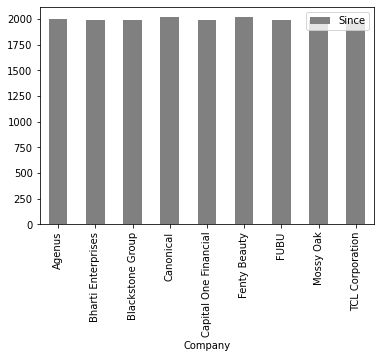

In [10]:
founders_df.plot(kind='bar', x='Company', y='Since', color='gray')

This looks pretty ridiculous, because the assumption is that dates start at 0, and that we are measuring dates!  

Could we change the graphed value to that conceptually makes more sense, e.g., maybe we should look at **how long** people have been CEOs?

(0.0, 70.0)

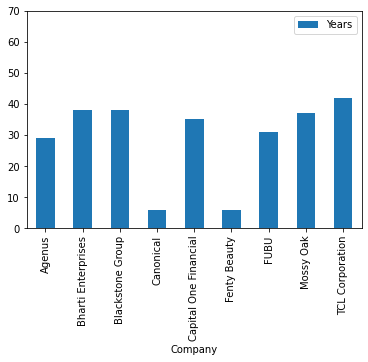

In [13]:
import datetime
now = datetime.datetime.now()

# Shows how long founding CEOs hold their position 
founders_df['Years'] = founders_df['Since'].apply(lambda x: now.year - x)
fig = founders_df.plot(kind='bar', x='Company', y='Years')

# Based on "domain expertise", we will assume no one should be CEO for more 
# than ~70 years -- if they started at 20, they would be 90...
fig.set_ylim([0, 70])

## Plotting for comparison

Let's look at how many folks founded companies in each year, comparing founding CEOs vs "regular" CEOs...

Here, year can be considered a continuous-valued parameter (although note that we are actually quantizing it to integer values, so fractional years aren't really useful here).

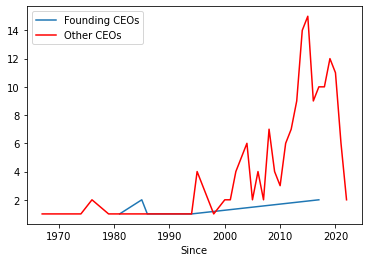

In [15]:
# gca stands for 'get current axis'
ax = plt.gca()

# Create counts for how many founders started (their company) in each year
founders_by_year = founders_df.groupby(['Since']).count()
founder = founders_by_year.plot(kind='line', y='Company', ax=ax, label='Founding CEOs')

# Creates counts for how many non-founder CEOs started (working for that company) in each year
regular_ceos_by_year = regular_ceos_df.groupby(['Since']).count()
regular = regular_ceos_by_year.plot(kind='line', y='Company', color='red', ax=ax, label='Other CEOs')

If we look closely at this graph, we'll note there seems to be one founding CEO every year. Could that be?  Maybe we should look more closely!!!

We'll re-plot, putting a marker at each point.  And perhaps we can even remove the line from the "founding CEO" plot, just looking at the markers...

Text(0.5, 0, 'Year CEO started')

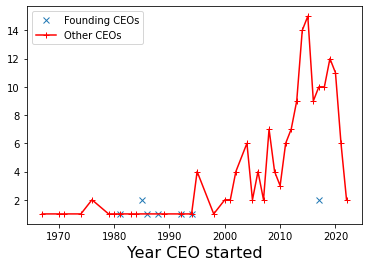

In [19]:
# Sharing the x-axis, allows us to plot multiple items against it
ax = plt.gca()

# Create counts for how many founders started in each year
founders_by_year = founders_df.groupby(['Since']).count()
founder = founders_by_year.plot(kind='line', y='Company', ax=ax, label='Founding CEOs', marker='x', linewidth=0)

regular_ceos_by_year = regular_ceos_df.groupby(['Since']).count()
regular = regular_ceos_by_year.plot(kind='line',y='Company', color='red', ax=ax, label='Other CEOs', marker='+')

plt.xlabel('Year CEO started', fontsize = 16)

Much clearer -- in fact the blue x's show that founding CEOs are not that common!

## Plotting and Thinking about Scale

Let's try another plot, here comparing three items...

<AxesSubplot:xlabel='scale'>

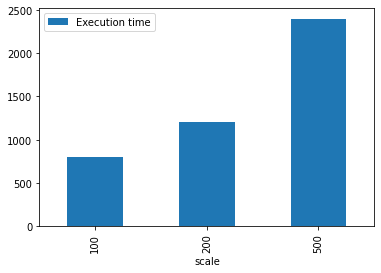

In [20]:
graph_df = pd.DataFrame([{'scale': 100, 'value': 800}, {'scale': 200, 'value': 1200}, {'scale': 500, 'value': 2400}])

graph_df.plot(kind='bar', x='scale', y='value', label='Execution time')

This plot is perfectly fine, but note that the x-axis actually contains **numeric** items, which might be continuous-valued.  Moreover, there is neither a log-scale nor a linear-scale progression along the axis -- so while our eyes see something that looks non-linear, in fact we can plot this as a line chart and see what's really happening...

<AxesSubplot:xlabel='scale'>

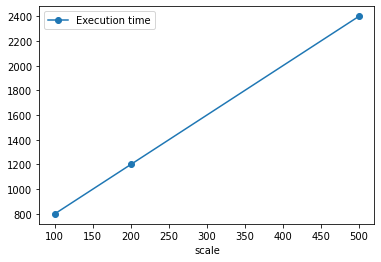

In [21]:
graph_df.plot(kind='line', x='scale', y='value', label='Execution time', marker='o')

## Plotting and Normalization

Now let's look at data and scaling, where perhaps we are looking at phenomena that are quite different. 
A common situation is to measure the running time of three computations, using some baseline computation and comparing it with some alternate computation.  We can plot this using bar charts as we see below.

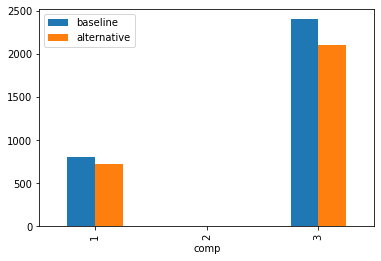

In [22]:
# Suppose we are counting for three computations and two different components, the baseline computation and the alternative.

# These are the "baseline" numbers for some computation
baseline_df = pd.DataFrame([{'comp': 1, 'value': 800}, {'comp': 2, 'value': 5}, {'comp': 3, 'value': 2400}])
# These are alternative computations
alternative_df = pd.DataFrame([{'comp': 1, 'value': 720}, {'comp': 2, 'value': 3}, {'comp': 3, 'value': 2100}])

# We want to plot side-by-side
combined_df = baseline_df.rename(columns={'value': 'baseline'})
combined_df['alternative'] = alternative_df['value']

fig = combined_df.plot.bar(x='comp')

Wow, we can't see computation #2 at all!  Given that each plot is very different, we may want to normalize each...

Text(0.5, 1.0, 'Normalized Performance')

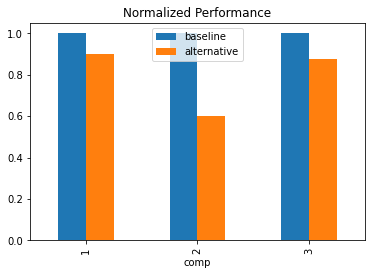

In [24]:
# Normilizes the scale by dividing alterntive by baseline to get percentage 0.9, 0.6, 0.875
rescaled_df = combined_df.copy()
rescaled_df['alternative'] = combined_df.apply(lambda r: r['alternative'] / r['baseline'], axis=1)

# Establishes 1.0 as a baseline to clearly see how much faster alternative was
rescaled_df['baseline'] = combined_df.apply(lambda r: 1.0, axis=1)

fig = rescaled_df.plot(kind='bar', x='comp')
fig.set_title('Normalized Performance')

Note that an "honest" presentation of the data will emphasize that these are normalized, and that the relative running times are quite different.  In fact, sometimes people will put a caption above each bar showing the actual timings.

## ggplot and the Grammar of Graphics

This part of the notebook shows some examples of using ggplot (as ported from its original R implementation) in Python.

In [25]:
!pip3 install ggplot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 24.8 MB/s eta 0:00:00


In [29]:
# NOTE: this is (on 10-29-2019) a known incompatibility between Pandas and ggplot https://github.com/yhat/ggpy/issues/662

# So the cell does not work as it should at the moment!

#from ggplot import *

#ggplot(rescaled_df, aes(x='comp', y='alternative')) + geom_line() + stat_smooth()

# Visualization of Statistical Data with Seaborn

In [30]:
!pip install seaborn

import seaborn as sb

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [32]:
# Some simple data, random points around a line
points = 150
slope = 0.3

x = np.array(range(points))
# We'll plot these
y = np.random.randn(points) * 5 + x * slope
# Choose a random integer, set z to True if it's positive, else set z to False
z = map(lambda x: x >= 0, np.random.randn(points))

sample_df = pd.DataFrame({'x': x, 'y': y, 'z': z})
sample_df

,x,y,z
0,0,6.097381,True
1,1,5.804087,False
2,2,2.128627,True
3,3,-5.397522,False
4,4,-8.906184,True
...,...,...,...
145,145,37.250409,True
146,146,41.992011,False
147,147,41.446823,False
148,148,40.442135,True


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


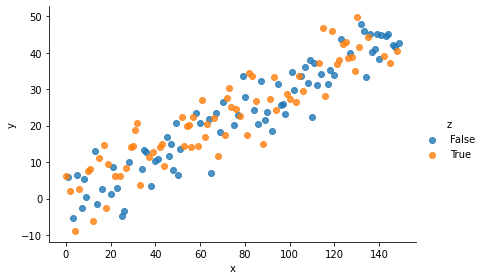

In [33]:
# Do a scatter plot, with height 4, shading the points based on whether z is True
sb.lmplot('x', 'y', data=sample_df, height=4, aspect=1.5, fit_reg=False, hue="z")

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


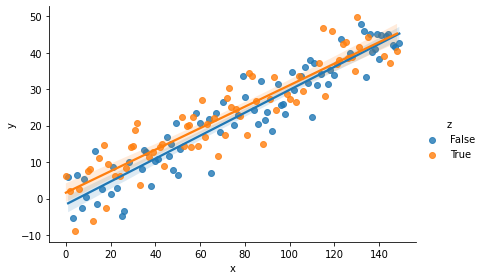

In [34]:
# Do a scatter plot, with height 4, shading the points based on whether z is True
sb.lmplot('x', 'y', data=sample_df, height=4, aspect=1.5, fit_reg=True, hue="z")

In [35]:
# Sample dataset with people + tips
tips_dataset = sb.load_dataset('tips')
tips_dataset

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


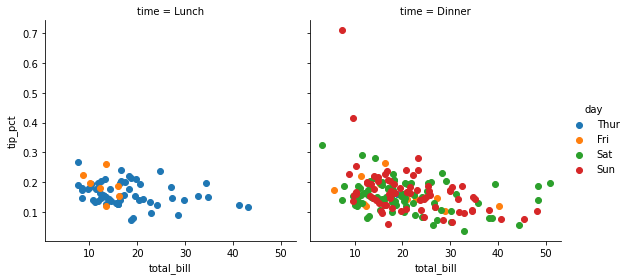

In [39]:
# Sample dataset with people + tips
tips_dataset = sb.load_dataset('tips')

# The question: how do people tip on different days of the week?
tips_dataset['tip_pct'] = tips_dataset.apply(lambda r: r['tip'] / r['total_bill'], axis=1)

# Creates a different graph for each value of 'time' (lunch vs dinner)
g = sb.FacetGrid(tips_dataset, col='time', hue='day', height=4, aspect=1)

# Within each graph, plots total bill vs tip
g.map(plt.scatter, 'total_bill', 'tip_pct')
g.add_legend()

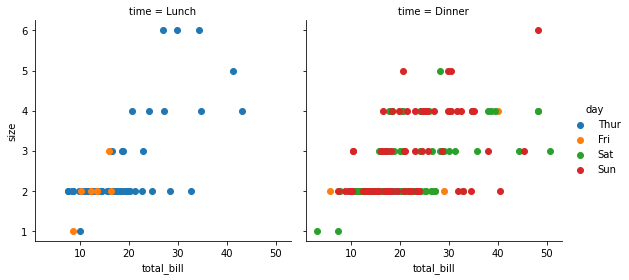

In [40]:
# Creates a different graph for each value of 'time' (lunch vs dinner)
g = sb.FacetGrid(tips_dataset, col='time', hue='day', height=4, aspect=1)

# Within each graph, plot total bill vs tip
g.map(plt.scatter, 'total_bill', 'size')
g.add_legend()

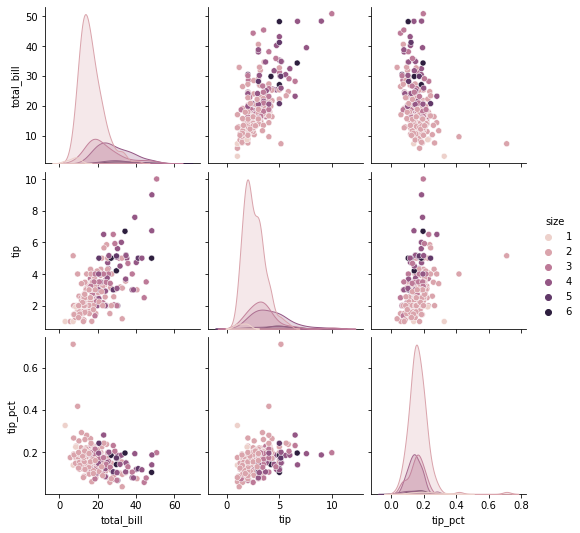

In [41]:
# Let's look at how different factors are influenced by the size
# of the party
sb.pairplot(data=tips_dataset,kind='scatter', hue='size')

In [42]:
# Create histogram bins of size 5
bins = np.arange(tips_dataset.total_bill.min(), tips_dataset.total_bill.max(), 5)

# Cut the bins, and group by size
by_bill_binned = tips_dataset.groupby([pd.cut(tips_dataset.total_bill, bins, precision=0), 
                                       'size']).size().unstack().fillna(0)

by_bill_binned

size,1,2,3,4,5,6
total_bill,,,,,,
"(3.0, 8.0]",1,5,0,0,0,0
"(8.0, 13.0]",2,46,2,0,0,0
"(13.0, 18.0]",0,57,12,2,0,0
"(18.0, 23.0]",0,29,9,8,1,0
"(23.0, 28.0]",0,11,5,11,0,1
"(28.0, 33.0]",0,6,5,5,3,1
"(33.0, 38.0]",0,1,2,5,0,1
"(38.0, 43.0]",0,1,0,3,1,0
"(43.0, 48.0]",0,0,2,1,0,0


<AxesSubplot:xlabel='size', ylabel='total_bill'>

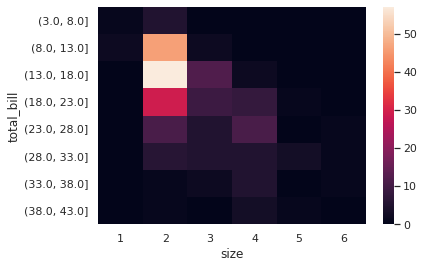

In [43]:
sb.set(font_scale=1.0)

sb.heatmap(by_bill_binned[by_bill_binned.sum(axis=1) > 3])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='time', ylabel='total_bill'>

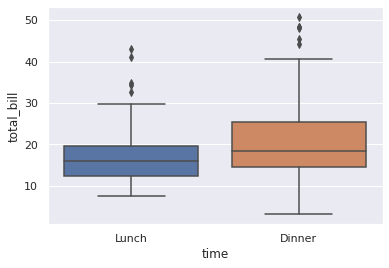

In [44]:
sb.boxplot(tips_dataset.time, tips_dataset.total_bill)

In [45]:
tips_dataset.total_bill.sort_values()

67      3.07
92      5.75
111     7.25
172     7.25
149     7.51
       ...  
182    45.35
156    48.17
59     48.27
212    48.33
170    50.81
Name: total_bill, Length: 244, dtype: float64